In [40]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
from glob import glob
from datetime import datetime
from IPython.display import display
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline 

In [14]:
arquivos = glob("C:/Users/ppgar/OneDrive/Documentos/Dados/Treino/*.csv")
df = pd.DataFrame([])
for arquivo in arquivos:
    dados = pd.read_csv(arquivo, sep = ";")
    df = pd.concat([df, dados])
treino = df

In [15]:

treino['din_instante'] = pd.to_datetime(treino['din_instante'])
treino['din_instante'] = treino['din_instante'].dt.strftime('%Y-%m')
treino = treino.rename(columns = {'din_instante': 'data'})
display(treino.head())

,data,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipocombustivel,nom_usina,ceg,val_geracao,id_ons
0,2000-01,N,NORTE,PA,PARA,TIPO I,HIDROELÉTRICA,Hidráulica,Tucuruí,UHE.PH.PA.002889-4.01,2422.5,NaN
1,2000-01,NE,NORDESTE,AL,ALAGOAS,TIPO I,HIDROELÉTRICA,Hidráulica,Xingó,UHE.PH.SE.027053-9.01,1995.6,NaN
2,2000-01,NE,NORDESTE,BA,BAHIA,Pequenas Usinas (Tipo III),HIDROELÉTRICA,Hidráulica,Pequenas Centrais Hidroelétricas da Chesf,-,13.0,NaN
3,2000-01,NE,NORDESTE,BA,BAHIA,TIPO I,HIDROELÉTRICA,Hidráulica,Apolônio Sales,UHE.PH.AL.001510-5.01,202.5,NaN
4,2000-01,NE,NORDESTE,BA,BAHIA,TIPO I,HIDROELÉTRICA,Hidráulica,Paulo Afonso II,UHE.PH.BA.027048-2.01,269.8,NaN


In [52]:
treino = treino.drop(['nom_subsistema', 'nom_estado', 'ceg', 'id_ons', 'nom_tipousina', 'nom_usina', 'id_estado', 'cod_modalidadeoperacao'], axis = 1)




KeyError: "['nom_subsistema', 'nom_estado', 'ceg', 'id_ons', 'nom_tipousina', 'nom_usina', 'id_estado', 'cod_modalidadeoperacao'] not found in axis"

In [55]:
display(treino.groupby('id_subsistema').sum())

,val_geracao
id_subsistema,
N,8.132515e+08
NE,1.092222e+09
S,1.383696e+09
SE,5.336470e+09


In [17]:
norte = treino[treino['id_subsistema'] == "N"]
nordeste = treino[treino['id_subsistema'] == "NE"]
sul = treino[treino['id_subsistema'] == "S"]
sudeste = treino[treino['id_subsistema'] == "SE"]

#norte['data'] = norte['data'].str.replace('-', '').astype(int)

In [18]:
display(treino)

,data,id_subsistema,nom_tipocombustivel,val_geracao
0,2000-01,N,Hidráulica,2422.500
1,2000-01,NE,Hidráulica,1995.600
2,2000-01,NE,Hidráulica,13.000
3,2000-01,NE,Hidráulica,202.500
4,2000-01,NE,Hidráulica,269.800
...,...,...,...,...
4288651,2018-12,SE,Biomassa,21.000
4288652,2018-12,SE,Biomassa,13.000
4288653,2018-12,SE,Hidráulica,119.600
4288654,2018-12,SE,Hidráulica,476.403


In [19]:
norte = norte.groupby('data').sum('val_geracao')
sul = sul.groupby('data').sum('val_geracao')
sudeste = sudeste.groupby('data').sum('val_geracao')
nordeste = nordeste.groupby('data').sum('val_geracao')


In [20]:
display(norte)

,val_geracao
data,
2000-01,2459950.900
2000-02,2196414.200
2000-03,2261361.100
2000-04,2264178.200
2000-05,2430484.600
...,...
2018-08,5573038.178
2018-09,5048504.188
2018-10,4826781.938


In [21]:
model = auto_arima(norte, seasonal=True, m=12)

In [22]:
model.fit(norte)

ARIMA(order=(5, 1, 4), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

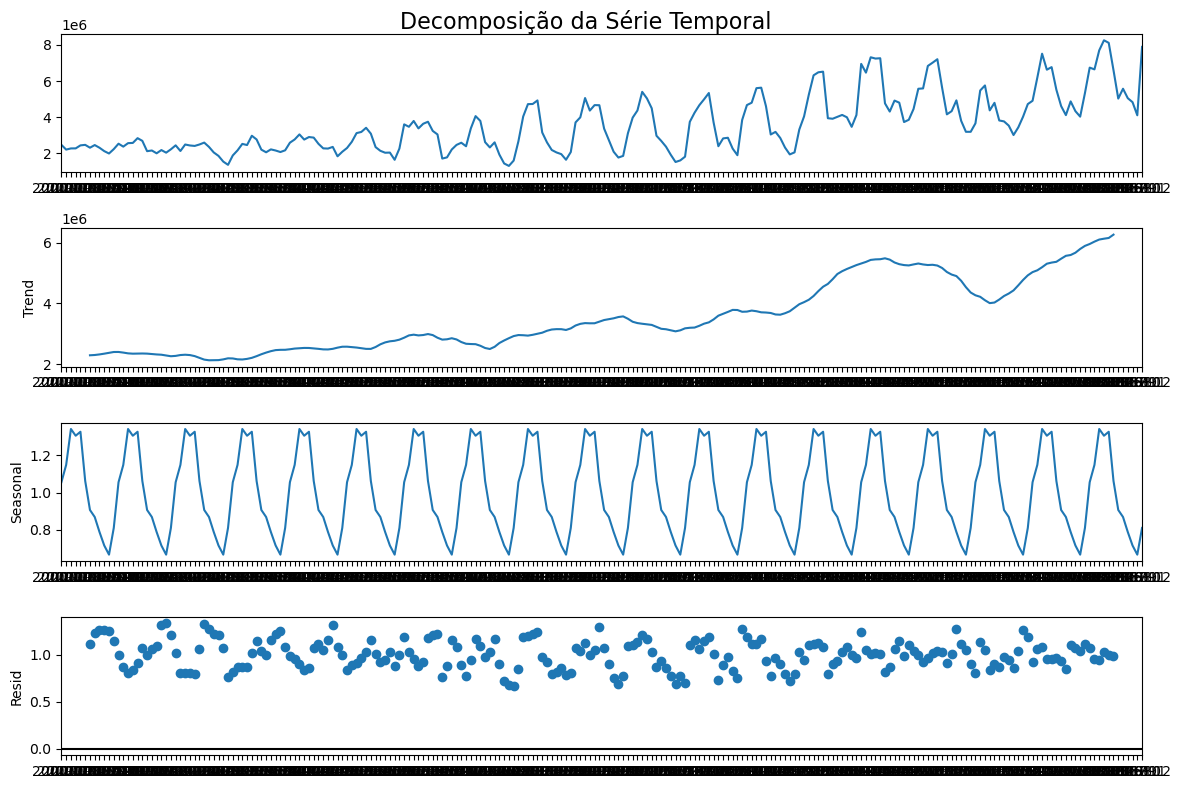

In [23]:
decomposition = seasonal_decompose(norte, model='multiplicative', period=12)  # decomposição anual
fig = decomposition.plot()
fig.set_size_inches(12, 8)
fig.add_gridspec()
fig.suptitle('Decomposição da Série Temporal', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.tick_params(labelsize=10)
plt.show()

In [24]:
arquivos = glob("C:/Users/ppgar/OneDrive/Documentos/Dados/Validacao/*.csv")
df = pd.DataFrame([])
for arquivo in arquivos:
    dados = pd.read_csv(arquivo, sep = ";")
    df = pd.concat([df, dados])
validacao = df


In [25]:
validacao['din_instante'] = pd.to_datetime(validacao['din_instante'])
validacao['din_instante'] = validacao['din_instante'].dt.strftime('%Y-%m')
validacao = validacao.rename(columns = {'din_instante': 'data'})


In [26]:
Vnorte = validacao[validacao['id_subsistema'] == "N"]
Vnordeste = validacao[validacao['id_subsistema'] == "NE"]
Vsul = validacao[validacao['id_subsistema'] == "S"]
Vsudeste = validacao[validacao['id_subsistema'] == "SE"]
Vnorte = Vnorte.groupby('data').sum('val_geracao')
Vsul = Vsul.groupby('data').sum('val_geracao')
Vsudeste = Vsudeste.groupby('data').sum('val_geracao')
Vnordeste = Vnordeste.groupby('data').sum('val_geracao')

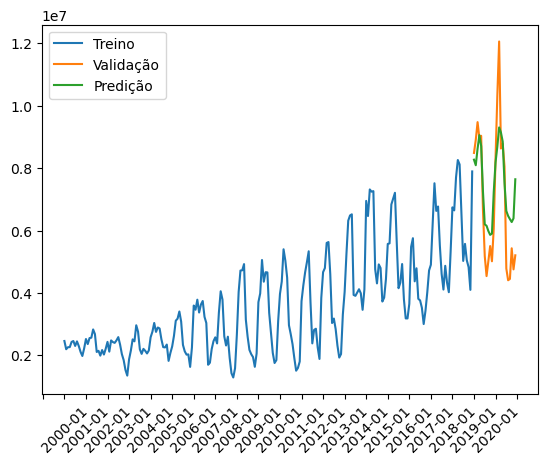

In [51]:
forecast = model.predict(n_periods=len(Vnorte))
forecast = pd.DataFrame(forecast,index = Vnorte.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(norte, label='Treino')
plt.plot(Vnorte, label='Validação')
plt.plot(forecast, label='Predição')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(12))
plt.xticks(rotation = 45)
plt.show()